<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests
                
import pandas as pd

url = "https://raw.githubusercontent.com/TAVAU/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv"

df = pd.read_csv(url)
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [12]:
def extract_description(html_doc):
    soup = BeautifulSoup(html_doc, 'html.parser')
    return soup.get_text()

In [8]:
html_doc = df['description'].iloc[0]
html_doc

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [9]:
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

b"
<div>
 <div>
  Job Requirements:
 </div>
 <ul>
  <li>
   <p>
    \nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them
   </p>
   \n
  </li>
  <li>
   <p>
    Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)
   </p>
   \n
  </li>
  <li>
   <p>
    Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R
   </p>
   \n
  </li>
  <li>
   <p>
    Ability to communicate Model findings to both Technical and Non-Technical stake holders
   </p>
   \n
  </li>
  <li>
   <p>
    Hands on experience in SQL/Hive or similar programming language
   </p>
   \n
  </li>
  <li>
   <p>
    Must show past work via GitHub, Kaggle or any other published article
   </p>
   \n
  </li>
  <

In [10]:
print(soup.get_text())

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [13]:
df['plain_description'] = df['description'].apply(extract_description)

In [14]:
df.head()

,Unnamed: 0,description,title,plain_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [16]:
df.shape

(426, 4)

In [17]:
""" Import Statements """

# Classics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
import en_core_web_sm
nlp = en_core_web_sm.load()

## 2) Use Spacy to tokenize the listings 

In [19]:
text = df['plain_description'].iloc[0]
text

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [20]:
doc = nlp(text)

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['b"Job', 'requirements:\\nconceptual', 'understanding', 'Machine', 'Learning', 'model', 'like', 'nai\\xc2\\xa8ve', 'Bayes', 'K', 'Means', 'SVM', 'Apriori', 'linear/', 'Logistic', 'Regression', 'Neural', 'Random', 'Forests', 'decision', 'Trees', 'K', 'NN', 'hand', 'experience', '2', 'them\\nintermediate', 'expert', 'level', 'coding', 'skill', 'Python', 'R.', 'ability', 'write', 'function', 'clean', 'efficient', 'datum', 'manipulation', 'mandatory', 'role)\\nexposure', 'package', 'like', 'NumPy', 'SciPy', 'Pandas', 'Matplotlib', 'etc', 'Python', 'GGPlot2', 'dplyr', 'tidyR', 'R\\nAbility', 'communicate', 'Model', 'finding', 'technical', 'Non', 'technical', 'stake', 'holders\\nhands', 'experience', 'SQL', 'hive', 'similar', 'programming', 'language\\nMust', 'past', 'work', 'GitHub', 'Kaggle', 'publish', 'article\\nMaster', 'degree', 'Statistics', 'Mathematics', 'Computer', 'Science', 'quant', 'specific', 'field.\\napply']


In [21]:
type(text)

str

In [38]:
texts = df['plain_description'].tolist()

In [30]:
len(texts)

426

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Learn our Vocab
vect = CountVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       min_df=3,
                       max_df=0.25,
                       max_features=20)
vect.fit(texts)

# Get sparse dtm (i.e. transform the data)
dtm = vect.transform(texts)

# Convert to dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(426, 20)


,applicants,applied,clients,deep,digital,engineers,functional,global,growth,intelligence,internal,job,model,nwhat,nyou,optimization,partners,plus,project,visualization
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,1,0,2,0,0,0,2,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
dtm

,applicants,applied,clients,deep,digital,engineers,functional,global,growth,intelligence,internal,job,model,nwhat,nyou,optimization,partners,plus,project,visualization
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,1,0,2,0,0,0,2,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
422,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,1,0,0,0
423,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
424,0,3,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0


## 4) Visualize the most common word counts

In [41]:
print(dtm)

     applicants  applied  clients  deep  digital  engineers  functional  \
0             0        0        0     0        0          0           0   
1             0        0        1     0        0          0           1   
2             0        1        0     0        0          0           0   
3             1        0        0     0        0          0           0   
4             0        0        0     0        0          0           0   
..          ...      ...      ...   ...      ...        ...         ...   
421           1        1        0     0        0          1           0   
422           0        0        0     1        0          1           0   
423           2        0        0     0        0          0           0   
424           0        3        0     0        0          1           0   
425           0        2        1     0        0          0           0   

     global  growth  intelligence  internal  job  model  nwhat  nyou  \
0         0       0        

In [45]:
doc_len = [len(doc) for doc in texts]

In [ ]:
# doc_len

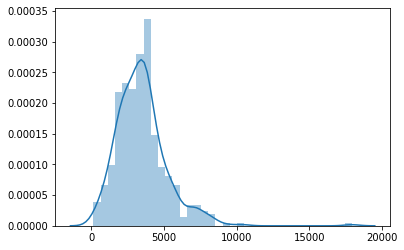

In [46]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [47]:
# inverse document frequency score 
# the plus ones are constants that shift the around the baseline value 
def idf(n, df):
    """
    Parameters
    ----------
    n: int
        num of docs in corpus 
        
    df: int
        num of docs that term t (i.e. a token) appears in 

    Returns
    -------
    inverse docuemnt frequency: float
    """
    return np.log( n/ df)

In [49]:
n = 426 # number of docs in corpus
IDF = []
for df in range(1, n + 1):
    idf_score = idf(n, df)
    IDF.append(idf_score)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        min_df=3,
                        max_df=0.25)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(texts)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
print(dtm.shape)
dtm.head()

(426, 12661)


,000,000 employees,000 yearthe,04,10,10 time,10 years,100,100 000,100 companies,...,years technical,years work,years working,years xe2,yearthe,yes,york,york city,york offices,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
def tokenize(document):
    """
    Takes a doc and returns a list of tokens in the form of lemmas.
    Stop words and punctuation are filtered out. 
    """
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [52]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                        tokenizer=tokenize,
                        ngram_range=(1,2),
                        min_df=3,
                        max_df=0.25)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(texts)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
print(dtm.shape)
dtm.head()

(426, 10595)


,$,"$ 100,000",$ 300,+ city,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,.\n\nperks\n\nhealth,.\n\nperks\n\nhealth insurance,/or,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.191363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Distance of TF-IDF Vectors
dist_matrix = cosine_similarity(dtm)
print(dist_matrix.shape)

# Turn it into a DataFrame
df = pd.DataFrame(dist_matrix)
df.head()

(426, 426)


,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,1.000000,0.004999,0.000000,0.000000,0.0,0.073660,0.010394,0.015008,0.015913,0.004278,...,0.017889,0.035677,0.006381,0.021932,0.003675,0.000000,0.008630,0.012508,0.024005,0.021505
1,0.004999,1.000000,0.024503,0.015014,0.0,0.028877,0.038529,0.034869,0.056147,0.038720,...,0.066901,0.076186,0.014918,0.025975,0.035892,0.059966,0.015977,0.034981,0.039052,0.030041
2,0.000000,0.024503,1.000000,0.003654,0.0,0.011243,0.037455,0.019055,0.008871,0.008585,...,0.008693,0.018724,0.010276,0.020089,0.017623,0.011979,0.008100,0.004686,0.046079,0.010216
3,0.000000,0.015014,0.003654,1.000000,0.0,0.021038,0.008155,0.035915,0.014732,0.048936,...,0.026597,0.015768,0.000000,0.029263,0.016358,0.032330,0.001742,0.059371,0.045562,0.082818
4,0.000000,0.000000,0.000000,0.000000,1.0,0.007327,0.000000,0.000000,0.015028,0.006702,...,0.006803,0.059570,0.000000,0.022100,0.000000,0.000000,0.000000,0.000000,0.018750,0.019886


In [54]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

# sample a doc from dtm to use as our query point 
doc = dtm.iloc[0].values

# Query Using kneighbors 
nn.kneighbors([doc])

(array([[0.        , 1.31296725, 1.33931178, 1.35169189, 1.35192411]]),
 array([[  0, 115, 274, 338, 403]]))

In [55]:
ideal_ds_job_description = ["""job related to crypto, deploy model using docker, kubernetes, python, working on aws/azure/gcp"""]

ideal_ds_job_description_tfidf = tfidf.transform(ideal_ds_job_description)
ideal_ds_job_description_tfidf

<1x10595 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [56]:
nn.kneighbors(ideal_ds_job_description_tfidf.todense())

(array([[1.33852416, 1.36224754, 1.36233266, 1.3652831 , 1.36692932]]),
 array([[ 38,   1, 350, 237, 391]]))

In [61]:
texts[350]

"b'Company Information\\nPACCAR is a Fortune 500 company established in 1905. PACCAR Inc is recognized as a global leader in the commercial vehicle, financial, and customer service fields with internationally recognized brands such as Kenworth, Peterbilt, and DAF trucks. PACCAR is a global technology leader in the design, manufacture and customer support of high-quality light-, medium- and heavy-duty trucks under the Kenworth, Peterbilt and DAF nameplates. PACCAR designs and manufactures advanced diesel engines and also provides customized financial services, information technology and truck parts related to its principal business.\\n\\nWhether you want to design the transportation technology of tomorrow, support the staff functions of a dynamic, international leader, or build our excellent products and services \\xe2\\x80\\x94 you can develop the career you desire with PACCAR. Get started!\\n\\nDivision Information\\nPACCAR\\xe2\\x80\\x99s Information Technology Division (ITD), locate

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 